# Imports

In [141]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Import Data, Initial EDA

### I got my data from Kaggle: 
https://www.kaggle.com/rio2016/olympic-games#athletes.csv


The data is a csv file with stats on every olympic athlete who competed in the 2016 Summer Olympics in Rio de Janeiro.

In [142]:
# things that are good to check
def initial_EDA(df):
    # print out the data types to make sure the numeric columns truly are numeric
    print(f'Do any columns contain null values?:\n{df.isnull().sum()}')
    # check the data types
    print(f'\nThe data types are:\n{df.dtypes}')
    # print the column names to make sure they are aptly named
    print(f'\nThe column names are:\n{df.columns}')
    # print the shape to see if it makes sense
    print(f'\nThe shape of your dataframe is:\n{df.shape}')
    # look at the descriptive stats for numerical columns in the data to get an initial feel for it
    print(f'\nDescriptive statistics:\n{df.describe()}')

In [143]:
# read in the csv, save as a dataframe

# a_df for athlete dataframe
a_df  = pd.read_csv('../data/athletes.csv')

In [144]:
initial_EDA(a_df)

Do any columns contain null values?:
id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

The data types are:
id               int64
name            object
nationality     object
sex             object
dob             object
height         float64
weight         float64
sport           object
gold             int64
silver           int64
bronze           int64
dtype: object

The column names are:
Index(['id', 'name', 'nationality', 'sex', 'dob', 'height', 'weight', 'sport',
       'gold', 'silver', 'bronze'],
      dtype='object')

The shape of your dataframe is:
(11538, 11)

Descriptive statistics:
                 id        height        weight          gold        silver  \
count  1.153800e+04  11208.000000  10879.000000  11538.000000  11538.000000   
mean   4.999885e+08      1.766282     72.068205      0.057722    

# Cleaning null values:

In [145]:
# drop the one row with the missing birthday:

# this shows us the problematic entry:
a_df.loc[a_df['dob'].isnull(), :]

# this drops teh problematic entry:
a_df = a_df.loc[a_df['dob'].notnull(), :].copy()

In [146]:
a_df.shape

(11537, 11)

In [147]:
a_df['sex'].value_counts()

male      6332
female    5205
Name: sex, dtype: int64

In [148]:
# now just need to impute the missing heights and weights
# I think I will impute with the average for their gender and sport

aquatics_women = a_df.loc[(a_df['sport'] == 'aquatics')&(a_df['sex']=='female'), :]['gold'].mean()



In [149]:
aquatics_women

0.09078212290502793

In [150]:
def impute_olympic_nans(df, col):
    nulls = df.loc[df[col].isnull(), :].copy()
    not_nulls = df.loc[df[col].notnull(), :].copy()
    
    # looping through the nulls and replacing them
    for i in nulls.index:
        sport = df.loc[i]['sport']
        gender = df.loc[i]['sex']
        mean_sport_gender = not_nulls.loc[(not_nulls['sport'] == sport) & (not_nulls['sex']== gender), :][col].mean()
        # CHANGING THE DATAFRAME:
        df.loc[i, col] = mean_sport_gender
        

In [151]:
impute_olympic_nans(a_df,'height')

In [152]:
impute_olympic_nans(a_df,'weight')

In [153]:
a_df.isnull().sum()

id               0
name             0
nationality      0
sex              0
dob              0
height           0
weight         286
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [154]:
a_df.loc[a_df['weight'].isnull(), :]['sport'].value_counts()

boxing    286
Name: sport, dtype: int64

In [155]:
# looks like there is no weight for the boxers!! That's ok. Maybe we will just do every sport except for boxing

In [156]:
286/a_df.shape[0]

0.02478980670884979

In [157]:
# it's only 2.5% of our data

In [158]:
a_df.dropna(inplace = True)

In [159]:
nulls_height.index

Int64Index([   12,    47,    50,    52,    56,    59,    62,    94,   139,
              165,
            ...
            10715, 10774, 10888, 10918, 11028, 11031, 11208, 11220, 11238,
            11370],
           dtype='int64', length=329)

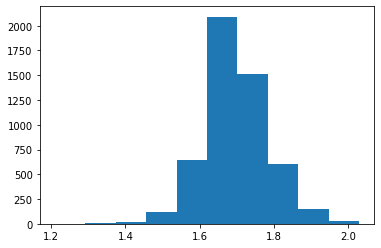

In [160]:
plt.hist(a_df.loc[a_df['sex']=='female', 'height']);

In [161]:
a_df.loc[a_df['sex']=='female', 'height']

1        1.68
8        1.80
9        1.65
13       1.61
14       1.78
         ... 
11527    1.80
11528    1.58
11530    1.85
11533    1.64
11534    1.73
Name: height, Length: 5169, dtype: float64

In [162]:
a_df.loc[12]['sport']

'aquatics'

In [163]:
a_df['nationality'].value_counts()

USA    559
BRA    476
GER    435
AUS    428
FRA    400
      ... 
BHU      2
SWZ      2
LBR      2
DMA      2
TUV      1
Name: nationality, Length: 207, dtype: int64

# Date time objects

In [164]:
date_time = pd.to_datetime(a_df['dob'])

In [165]:
years = [entry.year for entry in date_time]

In [166]:
years = [year - 100 if year > 2020 else year for year in years]

In [167]:
len(years)

11251

In [168]:
a_df.shape

(11251, 11)

In [169]:
max(years)

2002

In [170]:
min(years)

1954

In [171]:
#creating age column for the athlete's age in 2016

age = [2016-year for year in years]

In [172]:
min(age)

14

In [173]:
a_df['age'] = age

In [174]:
# making sure they all lined up properly
a_df[['dob','age']]

,dob,age
0,10/17/69,47
1,9/23/86,30
2,5/27/92,24
3,1/2/91,25
4,11/26/90,26
...,...,...
11533,8/10/95,21
11534,12/19/86,30
11535,5/14/91,25
11536,4/5/89,27


In [175]:
2016-1992

24

# One hot encoding

In [176]:
# look at column titles, choose which to dummy
a_df.columns

Index(['id', 'name', 'nationality', 'sex', 'dob', 'height', 'weight', 'sport',
       'gold', 'silver', 'bronze', 'age'],
      dtype='object')

In [177]:
a_df.dtypes


id               int64
name            object
nationality     object
sex             object
dob             object
height         float64
weight         float64
sport           object
gold             int64
silver           int64
bronze           int64
age              int64
dtype: object

In [178]:
# dummy the columns, replace the dataframe with the dummied version

cols_to_dummy = ['nationality','sport']
a_df_dummies = pd.get_dummies(a_df, columns = cols_to_dummy, drop_first = True)

# Men vs Women

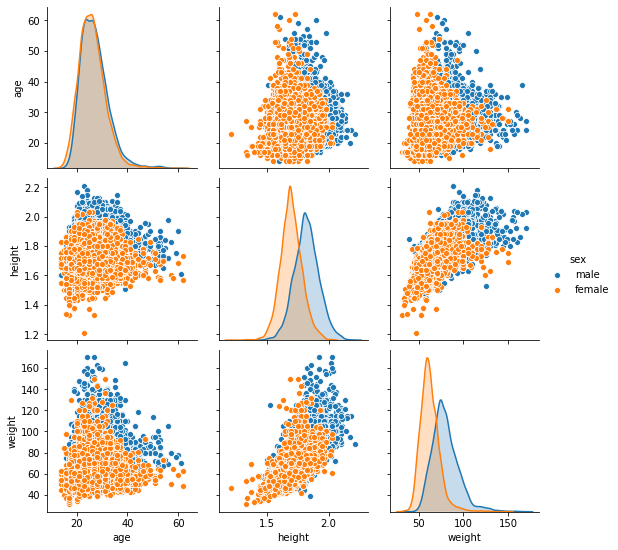

In [138]:
# Should we restrict our models to one gender? Does it matter? 

sns.pairplot(a_df[['age','height','weight','sex']], hue='sex')


# Export cleaned data as csv to use for modeling

In [179]:
a_df.to_csv('../data/athletes_clean.csv', index = False)

In [180]:
a_df_dummies.to_csv('../data/athletes_clean_dummies.csv', index = False)